In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
from scipy.stats import pearsonr
import sklearn.ensemble  
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word

In [154]:
df = pd.read_csv('train.csv')
df1 = pd.read_csv('test.csv')# use / not this \

# df = pd.merge(
#             df,
#             df1,
#             how='outer',
#             on='tweet_id',
#             indicator=True
# )

In [155]:
df.head(10)

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1
5,966,#technews One lone dude awaits iPad 2 at Apple...,1
6,1395,"SXSW Tips, Prince, NPR Videos, Toy Shopping Wi...",1
7,8182,NU user RT @mention New #UberSocial for #iPhon...,1
8,8835,Free #SXSW sampler on iTunes {link} #FreeMusic,2
9,883,I think I might go all weekend without seeing ...,2


In [156]:
df1.head()

,tweet_id,tweet
0,7506,Audience Q: What prototyping tools do you use?...
1,7992,At SXSW? Send Your Best Photos &amp; Videos to...
2,247,@mention and here's a pic of you winning your...
3,7688,Google Marissa Mayer: mobile phone as a cursor...
4,3294,#SXSW Google maps is even cooler than I thought


In [157]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1819 entries, 0 to 1818
Data columns (total 2 columns):
tweet_id    1819 non-null int64
tweet       1819 non-null object
dtypes: int64(1), object(1)
memory usage: 28.5+ KB


# Analyzing The Data

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7274 entries, 0 to 7273
Data columns (total 3 columns):
tweet_id     7274 non-null int64
tweet        7273 non-null object
sentiment    7274 non-null int64
dtypes: int64(2), object(1)
memory usage: 170.6+ KB


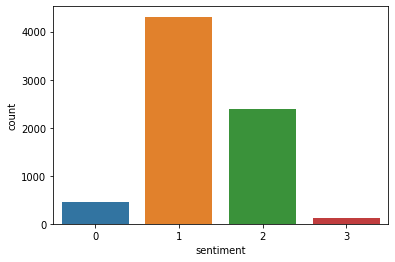

In [159]:
sns.countplot(x="sentiment",data=df)
#0: Negative, 1: Neutral, 2: Positive, 3: Can't Tell

# Data Wrangling

In [160]:
df.isnull().sum()

tweet_id     0
tweet        1
sentiment    0
dtype: int64

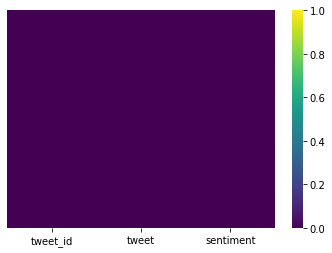

In [161]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")
#1 Missing Value 

In [162]:
df.drop("tweet_id",axis=1,inplace=True)

In [163]:
df.head(10)

,tweet,sentiment
0,#sxswnui #sxsw #apple defining language of tou...,1
1,Learning ab Google doodles! All doodles should...,1
2,one of the most in-your-face ex. of stealing t...,2
3,This iPhone #SXSW app would b pretty awesome i...,0
4,Line outside the Apple store in Austin waiting...,1
5,#technews One lone dude awaits iPad 2 at Apple...,1
6,"SXSW Tips, Prince, NPR Videos, Toy Shopping Wi...",1
7,NU user RT @mention New #UberSocial for #iPhon...,1
8,Free #SXSW sampler on iTunes {link} #FreeMusic,2
9,I think I might go all weekend without seeing ...,2


In [164]:
df.dropna(inplace=True)
#Dropping The Column

In [165]:
df.isnull().sum()

tweet        0
sentiment    0
dtype: int64

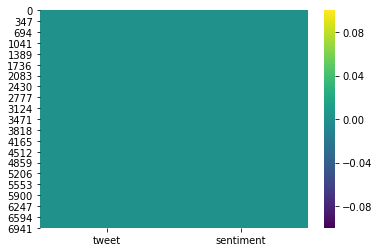

In [166]:
sns.heatmap(df.isnull(), linecolor="red",cmap="viridis") 
# Perfectly Clean Data

In [167]:
df.head(5)

,tweet,sentiment
0,#sxswnui #sxsw #apple defining language of tou...,1
1,Learning ab Google doodles! All doodles should...,1
2,one of the most in-your-face ex. of stealing t...,2
3,This iPhone #SXSW app would b pretty awesome i...,0
4,Line outside the Apple store in Austin waiting...,1


# Exploratory Data Analysis


In [168]:
df['word_count'] = df['tweet'].apply(lambda x: len(str(x).split(" ")))
df[['tweet','word_count']].head()

,tweet,word_count
0,#sxswnui #sxsw #apple defining language of tou...,12
1,Learning ab Google doodles! All doodles should...,19
2,one of the most in-your-face ex. of stealing t...,23
3,This iPhone #SXSW app would b pretty awesome i...,19
4,Line outside the Apple store in Austin waiting...,15


In [169]:
df['char_count'] = df['tweet'].str.len() ## this also includes spaces
df[['tweet','char_count']].head()

,tweet,char_count
0,#sxswnui #sxsw #apple defining language of tou...,89
1,Learning ab Google doodles! All doodles should...,143
2,one of the most in-your-face ex. of stealing t...,132
3,This iPhone #SXSW app would b pretty awesome i...,125
4,Line outside the Apple store in Austin waiting...,77


In [170]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df['tweet'].apply(lambda x: avg_word(x))
df[['tweet','avg_word']].head()

,tweet,avg_word
0,#sxswnui #sxsw #apple defining language of tou...,6.500000
1,Learning ab Google doodles! All doodles should...,6.578947
2,one of the most in-your-face ex. of stealing t...,5.000000
3,This iPhone #SXSW app would b pretty awesome i...,5.631579
4,Line outside the Apple store in Austin waiting...,4.500000


In [171]:
stop = stopwords.words('english')
df['stopwords'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['tweet','stopwords']].head()

,tweet,stopwords
0,#sxswnui #sxsw #apple defining language of tou...,2
1,Learning ab Google doodles! All doodles should...,4
2,one of the most in-your-face ex. of stealing t...,7
3,This iPhone #SXSW app would b pretty awesome i...,4
4,Line outside the Apple store in Austin waiting...,4


In [172]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [173]:
df['hastags'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
df[['tweet','hastags']].head()

,tweet,hastags
0,#sxswnui #sxsw #apple defining language of tou...,3
1,Learning ab Google doodles! All doodles should...,2
2,one of the most in-your-face ex. of stealing t...,1
3,This iPhone #SXSW app would b pretty awesome i...,3
4,Line outside the Apple store in Austin waiting...,1


In [174]:
df.head(5)

,tweet,sentiment,word_count,char_count,avg_word,stopwords,hastags
0,#sxswnui #sxsw #apple defining language of tou...,1,12,89,6.500000,2,3
1,Learning ab Google doodles! All doodles should...,1,19,143,6.578947,4,2
2,one of the most in-your-face ex. of stealing t...,2,23,132,5.000000,7,1
3,This iPhone #SXSW app would b pretty awesome i...,0,19,125,5.631579,4,3
4,Line outside the Apple store in Austin waiting...,1,15,77,4.500000,4,1


In [175]:
df['numerics'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df[['tweet','numerics']].head()
#Total Number Present

,tweet,numerics
0,#sxswnui #sxsw #apple defining language of tou...,0
1,Learning ab Google doodles! All doodles should...,0
2,one of the most in-your-face ex. of stealing t...,0
3,This iPhone #SXSW app would b pretty awesome i...,0
4,Line outside the Apple store in Austin waiting...,0


In [176]:
df['upper'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df[['tweet','upper']].head()
#Upper Case Characters Presnt in Datset

,tweet,upper
0,#sxswnui #sxsw #apple defining language of tou...,0
1,Learning ab Google doodles! All doodles should...,0
2,one of the most in-your-face ex. of stealing t...,2
3,This iPhone #SXSW app would b pretty awesome i...,1
4,Line outside the Apple store in Austin waiting...,1


In [177]:
df.tail(5)

,tweet,sentiment,word_count,char_count,avg_word,stopwords,hastags,numerics,upper
7269,@mention Google plze Tammi. I'm in middle of ...,1,16,93,5.200000,4,1,0,1
7270,RT @mention ÷¼ Are you all set? ÷_ {link} ÷...,1,15,91,5.133333,2,5,0,1
7271,RT @mention Aha! Found proof of lactation room...,1,22,140,5.409091,5,1,0,2
7272,We just launched our iPad app at #SXSW! Get al...,1,18,92,4.166667,6,1,0,2
7273,"The next fin serv battle is vs Apple, GOOG, Mo...",1,23,137,5.000000,4,2,0,2


#  Data Preprocessing And Cleaning

In [178]:
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['tweet'].head()
#Making Everything in LowerCase No Repeatations

0    #sxswnui #sxsw #apple defining language of tou...
1    learning ab google doodles! all doodles should...
2    one of the most in-your-face ex. of stealing t...
3    this iphone #sxsw app would b pretty awesome i...
4    line outside the apple store in austin waiting...
Name: tweet, dtype: object

In [179]:
df['tweet'] = df['tweet'].str.replace('[^\w\s]','')
df['tweet'].head()
#REMOVING THE PUNCTUCATION

0    sxswnui sxsw apple defining language of touch ...
1    learning ab google doodles all doodles should ...
2    one of the most inyourface ex of stealing the ...
3    this iphone sxsw app would b pretty awesome if...
4    line outside the apple store in austin waiting...
Name: tweet, dtype: object

In [180]:
stop = stopwords.words('english')
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['tweet'].head()
# Removing Stopwords

0    sxswnui sxsw apple defining language touch dif...
1    learning ab google doodles doodles light funny...
2    one inyourface ex stealing show yrs rt mention...
3    iphone sxsw app would b pretty awesome didnt c...
4    line outside apple store austin waiting new ip...
Name: tweet, dtype: object

In [181]:
freq = pd.Series(' '.join(df['tweet']).split()).value_counts()[:10]
#Commonly Used Words And Thier Count

In [182]:
freq

sxsw       7540
mention    5512
link       3427
rt         2344
ipad       1912
google     1862
apple      1729
iphone     1215
store      1188
new         862
dtype: int64

In [183]:
freq = list(freq.index)
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['tweet'].head()
#Removing the Common Words

0    sxswnui defining language touch different dial...
1    learning ab doodles doodles light funny amp in...
2    one inyourface ex stealing show yrs quotat sch...
3    app would b pretty awesome didnt crash every 1...
4                          line outside austin waiting
Name: tweet, dtype: object

In [184]:
freq1 = pd.Series(' '.join(df['tweet']).split()).value_counts()[-10:]
# Rare Words From Dataset

In [185]:
freq1

voluntary         1
activations       1
socialgood        1
cloudcomputing    1
stations          1
nonot             1
empowering        1
ummm              1
threequarters     1
syd               1
dtype: int64

In [186]:
freq1 = list(freq1.index)
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq1))
df['tweet'].head()
#Removing Rare Words From Dataset

0    sxswnui defining language touch different dial...
1    learning ab doodles doodles light funny amp in...
2    one inyourface ex stealing show yrs quotat sch...
3    app would b pretty awesome didnt crash every 1...
4                          line outside austin waiting
Name: tweet, dtype: object

In [187]:
df['tweet'][:5].apply(lambda x: str(TextBlob(x).correct()))
#Words Correction analytics and analtycs

0    sxswnui defining language touch different dial...
1    learning ab doubles doubles light funny amp in...
2    one inyourface ex stealing show yes quotas sch...
3    pp would b pretty awesome didn crash every 10m...
4                          line outside austin waiting
Name: tweet, dtype: object

In [188]:
TextBlob(df['tweet'][1]).words

WordList(['learning', 'ab', 'doodles', 'doodles', 'light', 'funny', 'amp', 'innovative', 'exceptions', 'significant', 'occasions', 'googledoodle'])

In [189]:
st = PorterStemmer()
df['tweet'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
#removal of suffices, like “ing”, “ly”, “s”, etc. 

0    sxswnui defin languag touch differ dialect bec...
1    learn ab doodl doodl light funni amp innov exc...
2    one inyourfac ex steal show yr quotat school m...
3    app would b pretti awesom didnt crash everi 10...
4                              line outsid austin wait
Name: tweet, dtype: object

In [190]:
df.head(5)

,tweet,sentiment,word_count,char_count,avg_word,stopwords,hastags,numerics,upper
0,sxswnui defining language touch different dial...,1,12,89,6.500000,2,3,0,0
1,learning ab doodles doodles light funny amp in...,1,19,143,6.578947,4,2,0,0
2,one inyourface ex stealing show yrs quotat sch...,2,23,132,5.000000,7,1,0,2
3,app would b pretty awesome didnt crash every 1...,0,19,125,5.631579,4,3,0,1
4,line outside austin waiting,1,15,77,4.500000,4,1,0,1


# Advanced Text Processing

In [191]:
TextBlob(df['tweet'][0]).ngrams(2)
#N-grams are the combination of multiple words used together. 

[WordList(['sxswnui', 'defining']),
 WordList(['defining', 'language']),
 WordList(['language', 'touch']),
 WordList(['touch', 'different']),
 WordList(['different', 'dialects']),
 WordList(['dialects', 'becoming']),
 WordList(['becoming', 'smaller'])]

In [192]:
tf1 = (df['tweet'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1
#Term frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence.

,words,tf
0,doodles,2
1,googledoodle,1
2,ab,1
3,significant,1
4,innovative,1
5,funny,1
6,light,1
7,learning,1
8,exceptions,1
9,amp,1


In [193]:
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(df.shape[0]/(len(df[df['tweet'].str.contains(word)])))
tf1
#The intuition behind inverse document frequency (IDF) is that a word is not of much use to us if it’s appearing
#in all the documents.

,words,tf,idf
0,doodles,2,5.800882
1,googledoodle,1,6.183874
2,ab,1,2.787131
3,significant,1,8.891924
4,innovative,1,7.793312
5,funny,1,5.896192
6,light,1,4.687232
7,learning,1,6.326975
8,exceptions,1,8.891924
9,amp,1,2.349452


In [194]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1
#TF-IDF is the multiplication of the TF and IDF which we calculated above.

,words,tf,idf,tfidf
0,doodles,2,5.800882,11.601763
1,googledoodle,1,6.183874,6.183874
2,ab,1,2.787131,2.787131
3,significant,1,8.891924,8.891924
4,innovative,1,7.793312,7.793312
5,funny,1,5.896192,5.896192
6,light,1,4.687232,4.687232
7,learning,1,6.326975,6.326975
8,exceptions,1,8.891924,8.891924
9,amp,1,2.349452,2.349452


In [195]:
df_copy=df

In [196]:
df_copy.head()

,tweet,sentiment,word_count,char_count,avg_word,stopwords,hastags,numerics,upper
0,sxswnui defining language touch different dial...,1,12,89,6.500000,2,3,0,0
1,learning ab doodles doodles light funny amp in...,1,19,143,6.578947,4,2,0,0
2,one inyourface ex stealing show yrs quotat sch...,2,23,132,5.000000,7,1,0,2
3,app would b pretty awesome didnt crash every 1...,0,19,125,5.631579,4,3,0,1
4,line outside austin waiting,1,15,77,4.500000,4,1,0,1


In [53]:
# df.drop(["word_count","char_count","avg_word","hastags","numerics","upper","stopwords"],inplace=True,axis=1)

In [54]:
df.head(5)

,tweet,sentiment,word_count,char_count,avg_word,stopwords,hastags,numerics,upper
0,sxswnui defining language touch different dial...,1,12,89,6.500000,2,3,0,0
1,learning ab doodles doodles light funny amp in...,1,19,143,6.578947,4,2,0,0
2,one inyourface ex stealing show yrs quotat sch...,2,23,132,5.000000,7,1,0,2
3,app would b pretty awesome didnt crash every 1...,0,19,125,5.631579,4,3,0,1
4,line outside austin waiting,1,15,77,4.500000,4,1,0,1


In [55]:
df.to_csv('newtwitter.csv') 

In [56]:
!pip install WordCloud

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [57]:
from wordcloud import WordCloud
from PIL import Image
import requests

In [58]:
all_words = ' '.join([text for text in df['tweet']])

In [59]:
mask = np.array(Image.open(requests.get('https://lofrev.net/wp-content/photos/2016/07/twitter_logo.jpg', stream=True).raw))

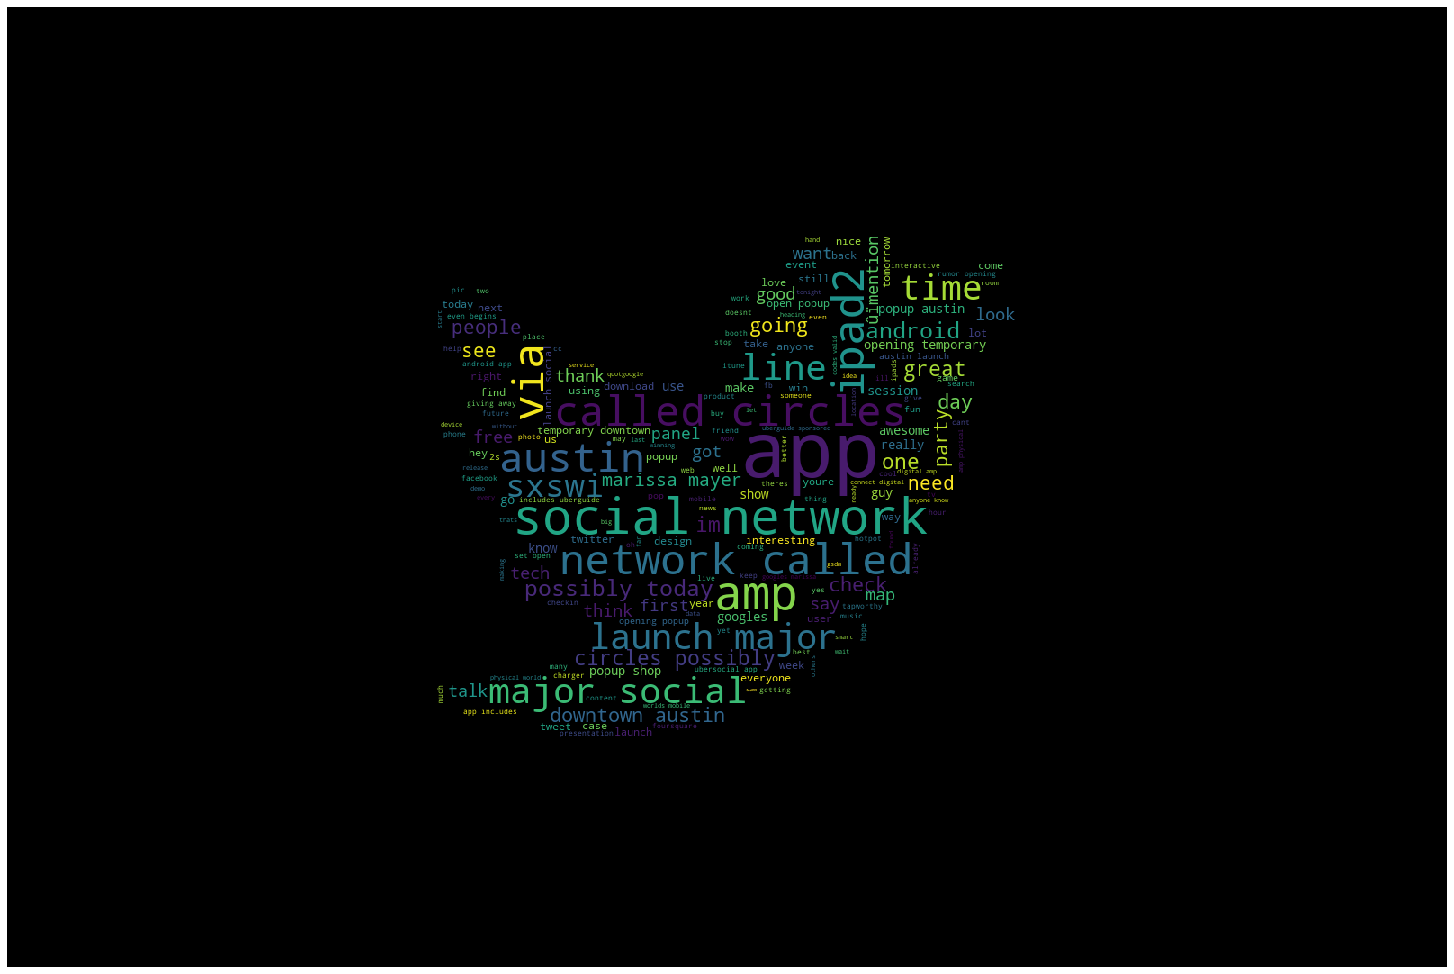

In [249]:
def generate_wordcloud(all_words, mask):
    word_cloud = WordCloud(width = 900, height = 600, background_color='black', mask=mask).generate(all_words)
    plt.figure(figsize=(20,18),facecolor = 'white', edgecolor='blue')
    plt.figure
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
generate_wordcloud(all_words,mask)

# Model I

In [61]:
df_copy.head()

,tweet,sentiment,word_count,char_count,avg_word,stopwords,hastags,numerics,upper
0,sxswnui defining language touch different dial...,1,12,89,6.500000,2,3,0,0
1,learning ab doodles doodles light funny amp in...,1,19,143,6.578947,4,2,0,0
2,one inyourface ex stealing show yrs quotat sch...,2,23,132,5.000000,7,1,0,2
3,app would b pretty awesome didnt crash every 1...,0,19,125,5.631579,4,3,0,1
4,line outside austin waiting,1,15,77,4.500000,4,1,0,1


In [62]:
import numpy as np
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(df_copy.drop(['sentiment'], axis = 1), df_copy['sentiment'], test_size=0.33, random_state=42)

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
stop_words= 'english',ngram_range=(1,1))
train_vect = tfidf.fit_transform(df_copy['tweet'])

train_vect

<7273x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 36486 stored elements in Compressed Sparse Row format>

In [77]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
train_bow = bow.fit_transform(df_copy['tweet'])
train_bow
#Bag of Words

<7273x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 40110 stored elements in Compressed Sparse Row format>

In [78]:
df_copy['tweet'][:5].apply(lambda x: TextBlob(x).sentiment)

0          (0.15, 0.65)
1    (0.38125, 0.89375)
2            (0.0, 0.0)
3          (0.625, 1.0)
4           (0.0, 0.05)
Name: tweet, dtype: object

In [79]:
df_copy.head()

,tweet,sentiment,word_count,char_count,avg_word,stopwords,hastags,numerics,upper
0,sxswnui defining language touch different dial...,1,12,89,6.500000,2,3,0,0
1,learning ab doodles doodles light funny amp in...,1,19,143,6.578947,4,2,0,0
2,one inyourface ex stealing show yrs quotat sch...,2,23,132,5.000000,7,1,0,2
3,app would b pretty awesome didnt crash every 1...,0,19,125,5.631579,4,3,0,1
4,line outside austin waiting,1,15,77,4.500000,4,1,0,1


In [90]:
df.head()

,tweet,sentiment,word_count,char_count,avg_word,stopwords,hastags,numerics,upper
0,sxswnui defining language touch different dial...,0.15000,12,89,6.500000,2,3,0,0
1,learning ab doodles doodles light funny amp in...,0.38125,19,143,6.578947,4,2,0,0
2,one inyourface ex stealing show yrs quotat sch...,0.00000,23,132,5.000000,7,1,0,2
3,app would b pretty awesome didnt crash every 1...,0.62500,19,125,5.631579,4,3,0,1
4,line outside austin waiting,0.00000,15,77,4.500000,4,1,0,1


In [80]:
df_copy['sentiment'] = df['tweet'].apply(lambda x: TextBlob(x).sentiment[0] )
df_copy[['tweet','sentiment']].head()

,tweet,sentiment
0,sxswnui defining language touch different dial...,0.15000
1,learning ab doodles doodles light funny amp in...,0.38125
2,one inyourface ex stealing show yrs quotat sch...,0.00000
3,app would b pretty awesome didnt crash every 1...,0.62500
4,line outside austin waiting,0.00000


In [146]:
df_copy.sentiment.value_counts()

 0.000000    3442
 0.500000     270
 0.400000     232
 0.200000     190
 0.250000     165
             ... 
 0.378788       1
 0.471429       1
 0.621429       1
-0.088889       1
-0.111111       1
Name: sentiment, Length: 446, dtype: int64

In [81]:
df_copy['sentiment']

0       0.15000
1       0.38125
2       0.00000
3       0.62500
4       0.00000
         ...   
7269    0.05000
7270    0.00000
7271   -0.02500
7272    0.32500
7273    0.00000
Name: sentiment, Length: 7273, dtype: float64

# Testing 


In [132]:
from sklearn.metrics import classification_report
y_true = df['sentiment']
y_pred = df_copy['sentiment']
#0: Negative, 1: Neutral, 2: Positive, 3: Can't Tell
target_names = ['0', '1', '2','3']
# print(classification_report(y_true, y_pred, target_names=target_names)

In [133]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7273 entries, 0 to 7273
Data columns (total 9 columns):
tweet         7273 non-null object
sentiment     7273 non-null float64
word_count    7273 non-null int64
char_count    7273 non-null int64
avg_word      7273 non-null float64
stopwords     7273 non-null int64
hastags       7273 non-null int64
numerics      7273 non-null int64
upper         7273 non-null int64
dtypes: float64(2), int64(6), object(1)
memory usage: 888.2+ KB


In [134]:
y_true.head(20)

0     1
1     1
2     2
3     0
4     1
5     1
6     1
7     1
8     2
9     2
10    3
11    2
12    2
13    1
14    1
15    1
16    1
17    2
18    1
19    1
Name: sentiment, dtype: int64

0       0.0
1       0.0
2       0.0
3       1.0
4       0.0
       ... 
7269    0.0
7270    0.0
7271   -0.0
7272    0.0
7273    0.0
Name: sentiment, Length: 7273, dtype: float64

In [137]:
y_pred = y_pred.abs()

In [139]:
y_pred = y_pred.round(decimals=0)

In [140]:
y_pred

0       0.0
1       0.0
2       0.0
3       1.0
4       0.0
       ... 
7269    0.0
7270    0.0
7271    0.0
7272    0.0
7273    0.0
Name: sentiment, Length: 7273, dtype: float64

In [141]:
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.06      0.88      0.11       456
           1       0.38      0.06      0.10      4310
           2       0.00      0.00      0.00      2382
           3       0.00      0.00      0.00       125

    accuracy                           0.09      7273
   macro avg       0.11      0.23      0.05      7273
weighted avg       0.23      0.09      0.07      7273



C:\Users\Shaikh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


***
# Model II - SVM

In [149]:
df_copy.head()

,tweet,sentiment,word_count,char_count,avg_word,stopwords,hastags,numerics,upper
0,sxswnui defining language touch different dial...,0.15000,12,89,6.500000,2,3,0,0
1,learning ab doodles doodles light funny amp in...,0.38125,19,143,6.578947,4,2,0,0
2,one inyourface ex stealing show yrs quotat sch...,0.00000,23,132,5.000000,7,1,0,2
3,app would b pretty awesome didnt crash every 1...,0.62500,19,125,5.631579,4,3,0,1
4,line outside austin waiting,0.00000,15,77,4.500000,4,1,0,1


In [150]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create feature vectors
vectorizer = TfidfVectorizer(
                             min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True
                            )
train_vectors = vectorizer.fit_transform(df_copy['tweet'])
test_vectors = vectorizer.transform(df_copy['tweet'])

In [151]:
train_vectors

<7273x2018 sparse matrix of type '<class 'numpy.float64'>'
	with 46863 stored elements in Compressed Sparse Row format>

In [197]:
df_copy

,tweet,sentiment,word_count,char_count,avg_word,stopwords,hastags,numerics,upper
0,sxswnui defining language touch different dial...,1,12,89,6.500000,2,3,0,0
1,learning ab doodles doodles light funny amp in...,1,19,143,6.578947,4,2,0,0
2,one inyourface ex stealing show yrs quotat sch...,2,23,132,5.000000,7,1,0,2
3,app would b pretty awesome didnt crash every 1...,0,19,125,5.631579,4,3,0,1
4,line outside austin waiting,1,15,77,4.500000,4,1,0,1
...,...,...,...,...,...,...,...,...,...
7269,plze tammi im middle craziness everything sooo...,1,16,93,5.200000,4,1,0,1
7270,¼ set _ _ edchat musedchat sxswi newtwitter,1,15,91,5.133333,2,5,0,1
7271,aha found proof lactation room excuse quotmoth...,1,22,140,5.409091,5,1,0,2
7272,launched app get details first edition free,1,18,92,4.166667,6,1,0,2


In [199]:
import time
from sklearn import svm
from sklearn.metrics import classification_report
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors, df_copy['sentiment'])
t1 = time.time()
y_pred = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1

In [202]:
import warnings
warnings.filterwarnings('always')

In [203]:
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(df_copy['sentiment'], y_pred, output_dict=True)

Training time: 4.363214s; Prediction time: 2.779313s


C:\Users\Shaikh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Shaikh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Shaikh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [220]:
#Since Classification Report could not be generated due ti MetricWarning we use sklearn.metrics to calculate performance measure of our model

from sklearn.metrics import f1_score, precision_recall_fscore_support, accuracy_score
precision,recall,_,_ = precision_recall_fscore_support(
                                                        df_copy['sentiment'], 
                                                        y_pred,
                                                        average='weighted',
                                                        warn_for=tuple()
                                                    )

print("F1 Score: ",f1_score(df_copy['sentiment'], y_pred, average='weighted', labels=np.unique(y_pred)),
      "\nPrecision:",precision,"\nRecall:",recall, "\nAccuracy Score:", accuracy_score(df_copy['sentiment'], y_pred)

     )

F1 Score:  0.7468037529033524 
Precision: 0.755092924873162 
Recall: 0.7578715798157569 
Accuracy Score: 0.7578715798157569


In [241]:
Ser = pd.Series(y_pred).append(pd.Series([3]))
Ser.value_counts()

1    5399
2    1742
0     132
3       1
dtype: int64

In [248]:
df_copy['sentiment'].value_counts()

1    4310
2    2382
0     456
3     125
Name: sentiment, dtype: int64

(array([2., 0., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([ 125. ,  543.5,  962. , 1380.5, 1799. , 2217.5, 2636. , 3054.5,
        3473. , 3891.5, 4310. ]),
 <a list of 10 Patch objects>)

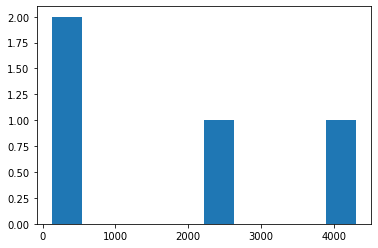